In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot synthesis results

In [62]:
import matplotlib.pyplot as plt

def heatmapPlot(x,y,des,n_bins):
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(8)
    plt.hist2d(x,y, bins=n_bins,cmap="magma_r")
    cb = plt.colorbar()
    #cb.set_label(label='# synthesis\n recipes',size=35,weight='bold')
    #cb.ax.tick_params(labelsize=16)
    #cb.set_label('Number of entries')

    # Add title and labels to plot.
    plt.title(des,weight='bold',fontsize=40)
    plt.xlabel('Nodes',fontsize=35,weight='bold')
    #plt.ylabel('Depth',fontsize=35,weight='bold')
    plt.xticks(rotation=30,weight='bold',fontsize=35)
    plt.yticks(weight='bold',fontsize=35)
    plt.locator_params(axis="x", nbins=4)
    plt.locator_params(axis="y", nbins=3)
    plt.savefig(des+'.pdf',fmt = 'pdf',bbox_inches='tight')
    plt.show()

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


def threeDBarPlot(x,y,des,n_bins):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    hist, xedges, yedges = np.histogram2d(x,y, bins=n_bins)

    # Add title and labels to plot.
    plt.title(des,weight='bold',fontsize=16)
    plt.xlabel('\n\narea',fontsize=16,weight='bold')
    plt.ylabel('\n\nDelay (ns)',fontsize=16,weight='bold')
    plt.xticks(weight='bold',fontsize=16)
    plt.yticks(weight='bold',fontsize=16)
    


    # Construct arrays for the anchor positions of the bars.
    # Note: np.meshgrid gives arrays in (ny, nx) so we use 'F' to flatten xpos,
    # ypos in column-major order. For numpy >= 1.7, we could instead call meshgrid
    # with indexing='ij'.
    xpos, ypos = np.meshgrid(xedges[:-1] + 1.15, yedges[:-1] + 1.15)
    xpos = xpos.flatten('F')
    ypos = ypos.flatten('F')
    zpos = np.zeros_like(xpos)

    # Construct arrays with the dimensions for the 16 bars.
    dx = 25 * np.ones_like(zpos)
    dy = dx.copy()
    dz = hist.flatten()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='sienna', zsort='average')

    # Show the plot.
    plt.savefig(des+'_3dbar.png',fmt = 'png')
    plt.show()

<ipython-input-71-74b69d9ee3dc>:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(des+'_3dbar.png',fmt = 'png')


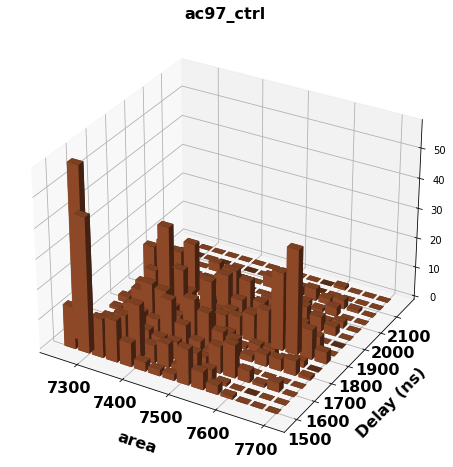

In [72]:
threeDBarPlot(area_val,delay_val,'ac97_ctrl',15)

<ipython-input-51-225aec4f54be>:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(des+'.png',fmt = 'png')


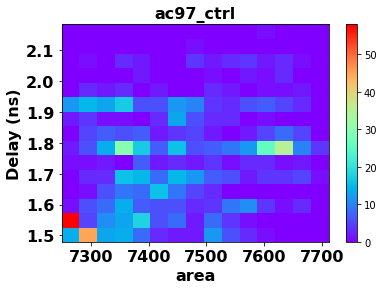

In [52]:
heatmapPlot(area_val,delay_val,'ac97_ctrl',15)

# Analyze and plot synthesis data

In [3]:
import glob,os

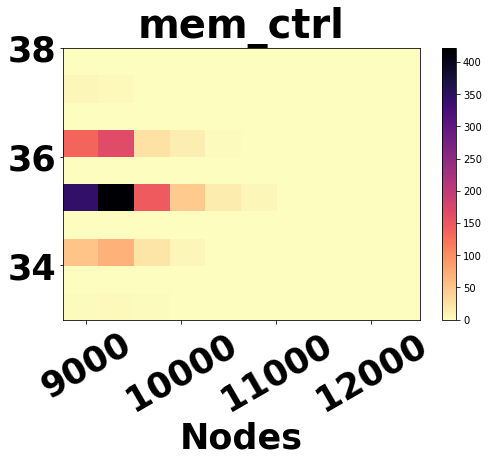

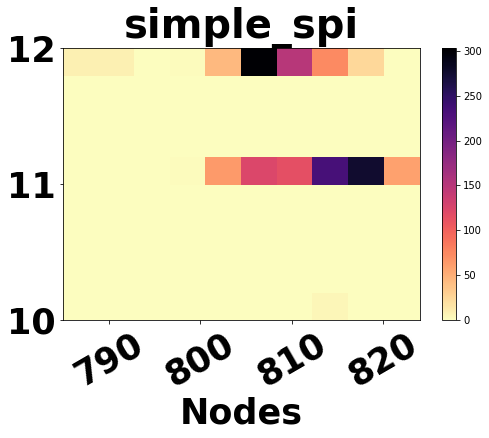

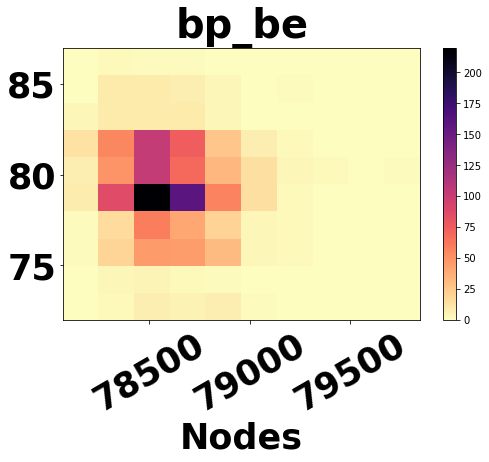

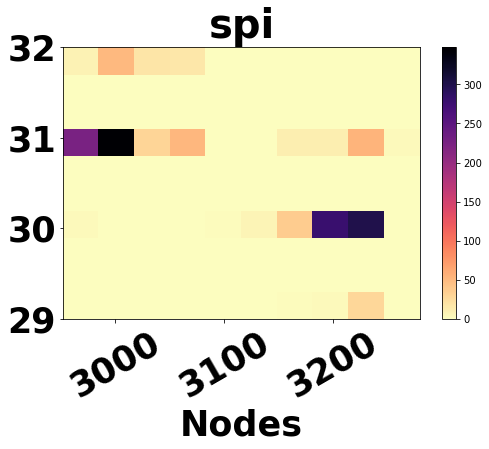

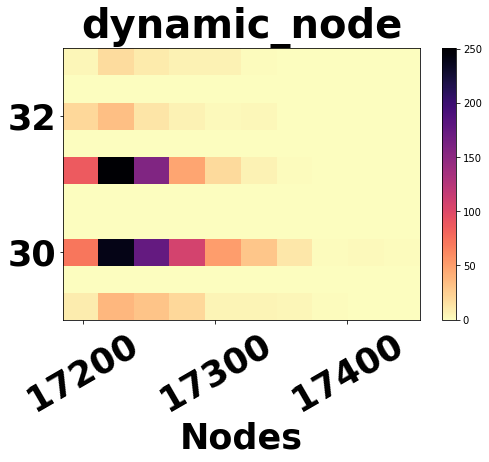

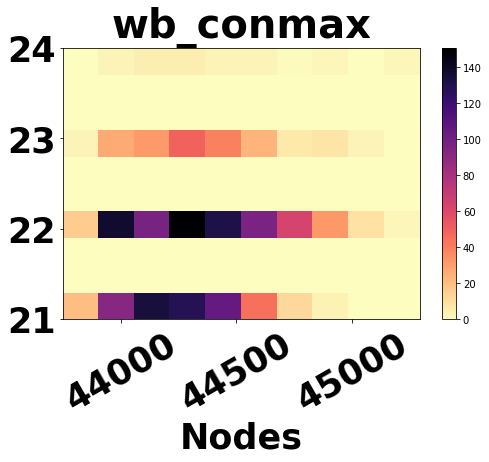

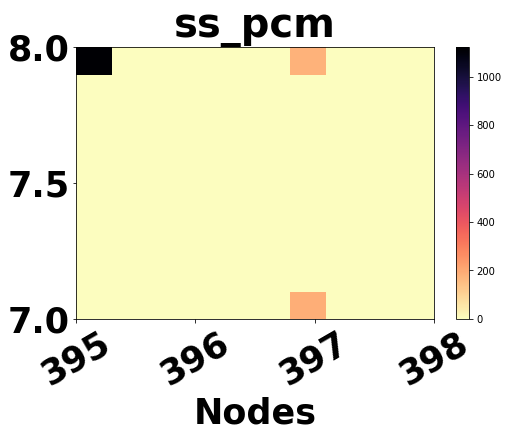

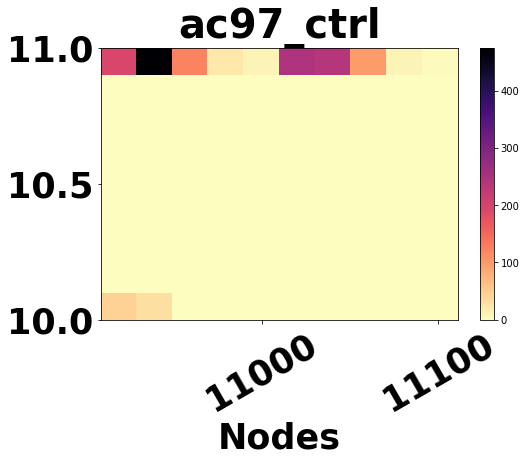

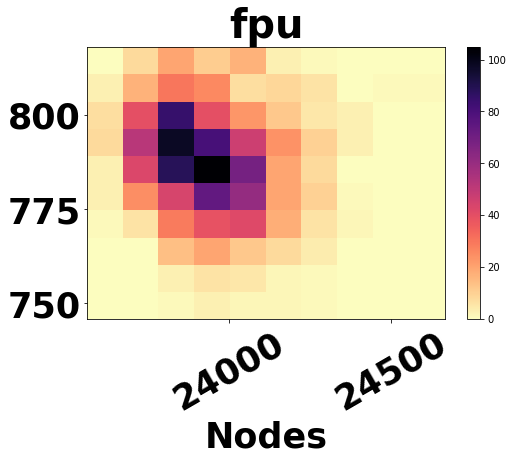

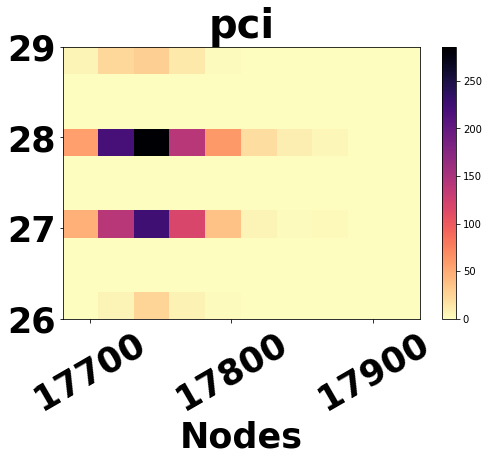

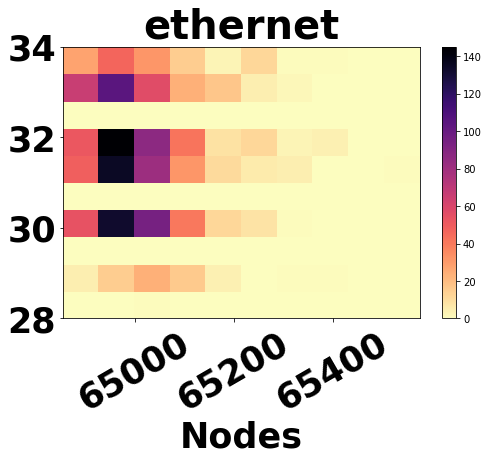

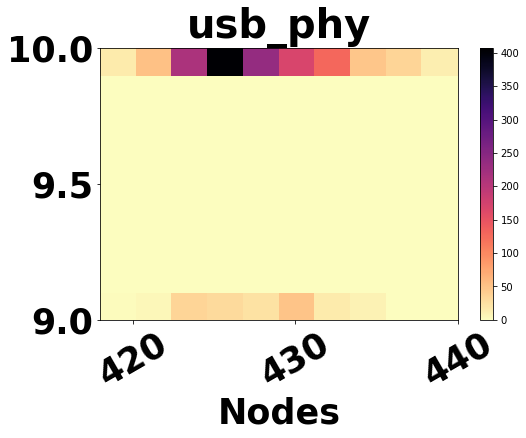

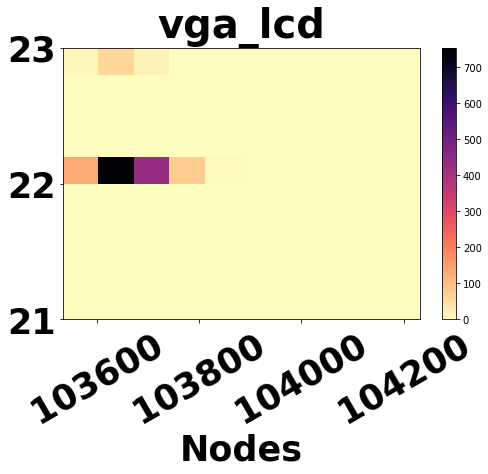

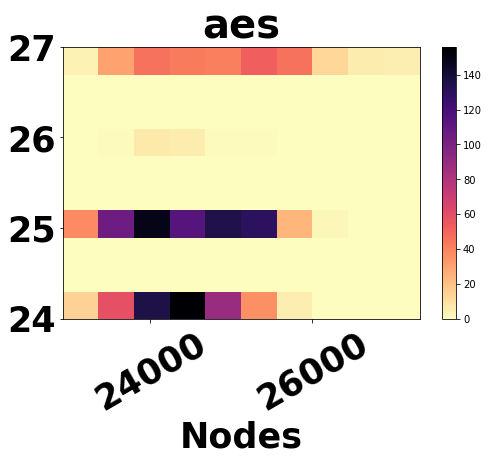

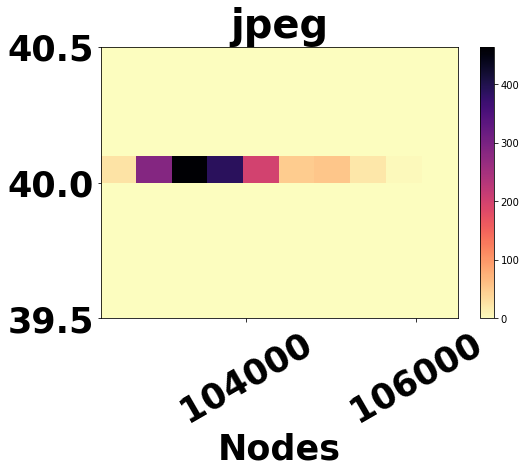

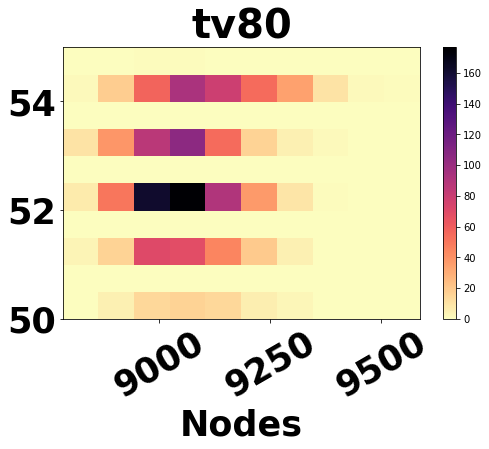

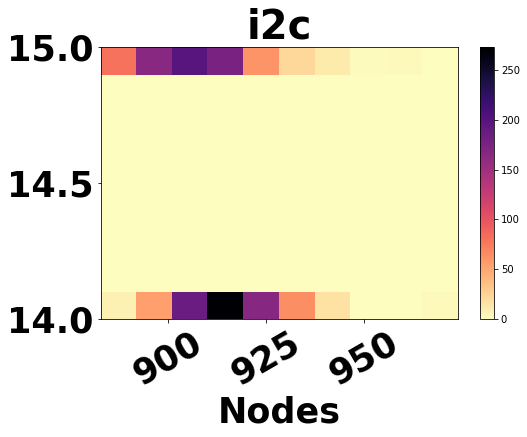

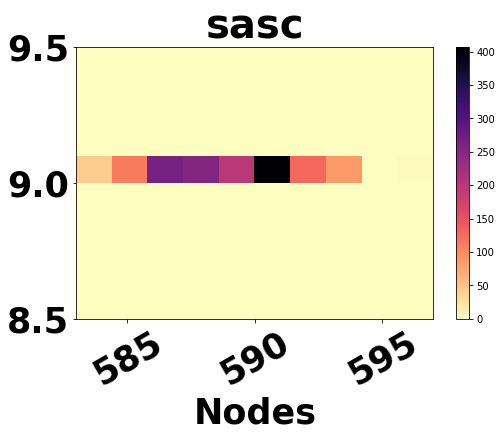

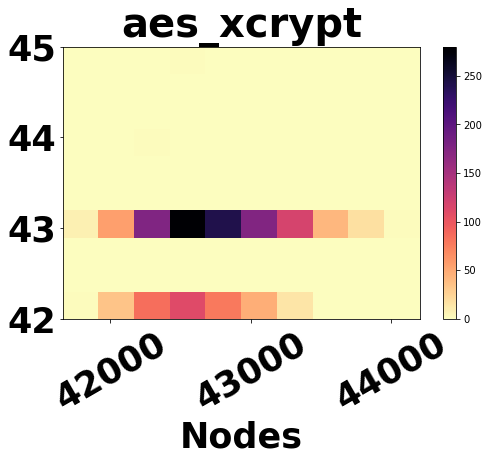

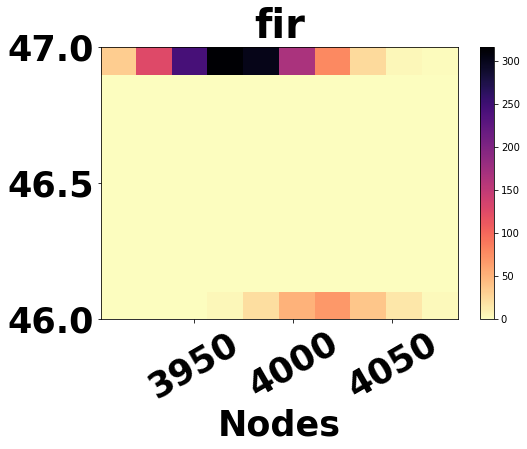

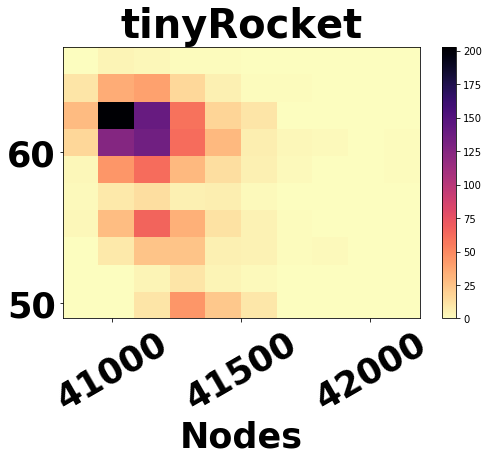

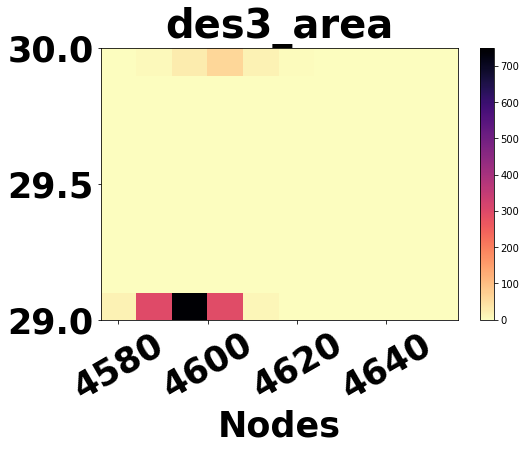

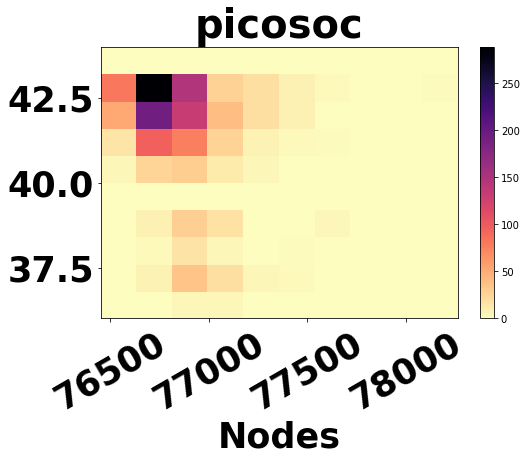

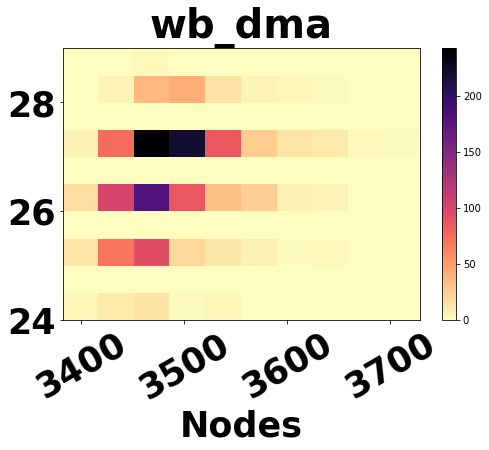

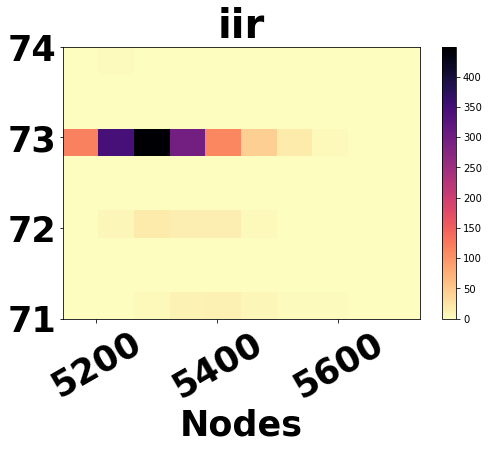

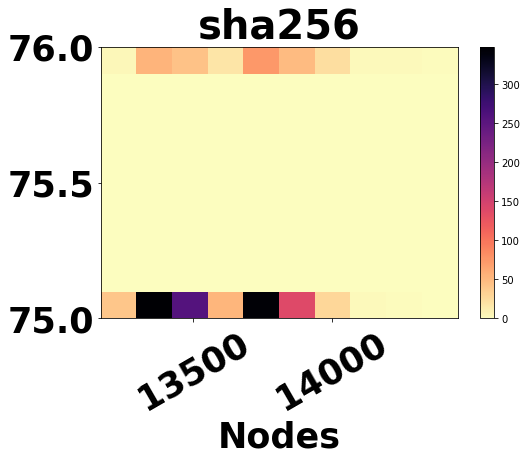

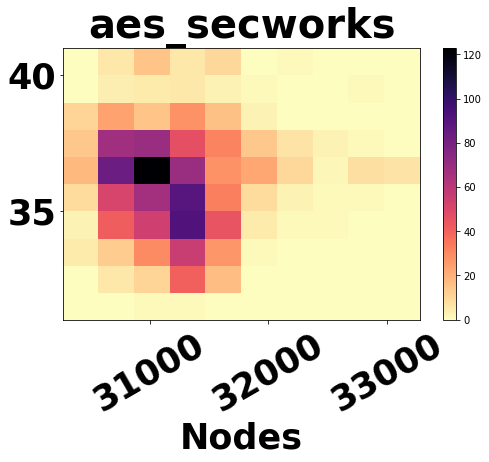

In [63]:
for file in glob.glob('/home/abc586/OPENABC_DATASET/graphml/postProcessing/final/*.csv'):
    df = pd.read_csv(file)
    df["nodes"] = df["AND"]#+df["NOT"]
    fileName = os.path.basename(file)
    desName = fileName.split("processed_")[1].split(".csv")[0]
    delayStat = df['LP'].to_numpy()
    areaStat = df['nodes'].to_numpy()
    heatmapPlot(areaStat,delayStat,desName,10)

In [ ]:
for file in glob.glob('raw/*.csv'):
    df = pd.read_csv(file)
    fileName = os.path.basename(file)
    desName = fileName.split("synthData_")[1].split(".csv")[0]
    delayStat = df['delay'].to_numpy()
    areaStat = df['area'].to_numpy()
    heatmapPlot(areaStat,delayStat,desName,20)

In [50]:
for file in glob.glob('synthReport/*.csv'):
    df = pd.read_csv(file)
    fileName = os.path.basename(file)
    desName = fileName.split("synthData_")[1].split(".csv")[0]
    df['ADP'] = df['area']*df['delay']
    df_ADP = df.sort_values(by=['ADP'],ascending=True).reset_index(drop=True)
    print(desName+" ID of lowest ADP:",df_ADP['SID'][0])

ibex ID of lowest ADP: 89
bp_fe ID of lowest ADP: 685
simple_spi ID of lowest ADP: 0
sasc ID of lowest ADP: 723
mem_ctrl ID of lowest ADP: 744
i2c ID of lowest ADP: 415
spi ID of lowest ADP: 26
des3_area ID of lowest ADP: 209
aes ID of lowest ADP: 1028
pci ID of lowest ADP: 616
ethernet ID of lowest ADP: 394
dynamic_node ID of lowest ADP: 64
ss_pcm ID of lowest ADP: 2623
tinyRocket ID of lowest ADP: 630
bp_multi ID of lowest ADP: 124
wb_conmax ID of lowest ADP: 953
bp_be ID of lowest ADP: 336
tv80 ID of lowest ADP: 750
jpeg ID of lowest ADP: 737
ac97_ctrl ID of lowest ADP: 962
vga_lcd ID of lowest ADP: 460
fpu ID of lowest ADP: 522
wb_dma ID of lowest ADP: 0
usb_phy ID of lowest ADP: 472


In [57]:
finalDF = None
for file in glob.glob('synthReport/*.csv'):
    df = pd.read_csv(file)
    fileName = os.path.basename(file)
    desName = fileName.split("synthData_")[1].split(".csv")[0]
    df['desName'] = desName
    if not isinstance(finalDF,pd.DataFrame):
        finalDF = df.copy(deep=True)
    else:
        finalDF = pd.concat([finalDF,df],axis=0)
    #print(desName+" ID of lowest ADP:",df_ADP['SID'][0])

,SID,wires,wireBits,publicWires,publicWireBits,memories,memoryBits,processes,cells,areaSynth,delay,delayPercent,area,areaPercent,gates,gatesPercent,desName
0,0,23228,23462,2009,2243,0,0,0,21373,29278.620,23510.03,24.6,16888.61,100.0,18061,14.0,ibex
1,1,24463,24697,2009,2243,0,0,0,22608,29809.822,22092.48,6.3,17586.32,100.0,19265,14.6,ibex
2,2,23501,23735,2009,2243,0,0,0,21646,29662.724,27111.45,32.5,17014.42,100.0,18334,15.4,ibex
3,3,23774,24008,2009,2243,0,0,0,21919,30889.782,24019.75,4.7,17191.31,100.0,18562,16.1,ibex
4,4,23558,23792,2009,2243,0,0,0,21703,31502.114,21224.58,31.9,17136.78,100.0,18340,16.0,ibex
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,598,613,114,129,0,0,0,490,880.194,453.73,7.7,315.74,100.0,366,26.5,usb_phy
996,996,579,594,114,129,0,0,0,471,865.830,453.36,4.6,310.95,100.0,350,25.4,usb_phy
997,997,602,617,114,129,0,0,0,494,868.224,461.66,3.0,318.93,100.0,368,25.3,usb_phy
998,998,584,599,114,129,0,0,0,476,838.166,503.52,6.2,313.35,100.0,354,24.9,usb_phy


<ipython-input-76-fd60b31ecbc8>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Gates_data.png',fmt = 'png',bbox_inches='tight')


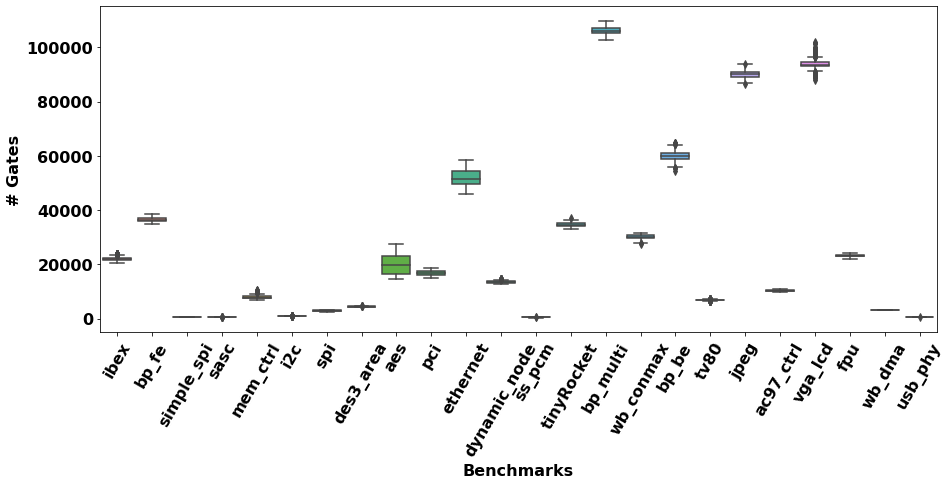

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

ax = sns.boxplot(x="desName", y="cells",data=finalDF)
#ax.set_yscale('log')
plt.xticks(rotation=60,weight='bold',fontsize=16)
plt.yticks(weight='bold',fontsize=16)
plt.xlabel('Benchmarks',weight='bold',fontsize=16)
plt.ylabel('# Gates',weight='bold',fontsize=16)
plt.savefig('Gates_data.png',fmt = 'png',bbox_inches='tight')
plt.show()

<ipython-input-75-6efff128d470>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('delay_data.png',fmt = 'png',bbox_inches='tight')


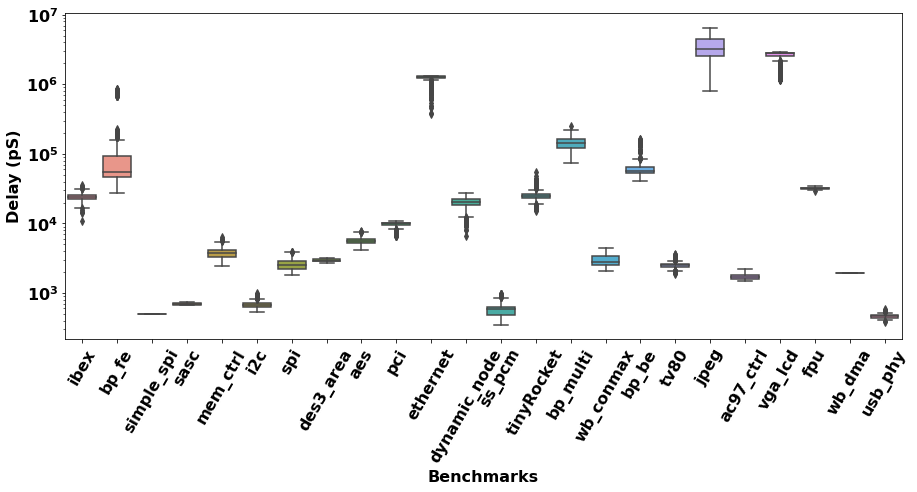

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

ax = sns.boxplot(x="desName", y="delay",data=finalDF)
ax.set_yscale('log')
plt.xticks(rotation=60,weight='bold',fontsize=16)
plt.yticks(weight='bold',fontsize=16)
plt.xlabel('Benchmarks',weight='bold',fontsize=16)
plt.ylabel('Delay (pS)',weight='bold',fontsize=16)
plt.savefig('delay_data.png',fmt = 'png',bbox_inches='tight')
plt.show()

<ipython-input-77-3524335e33aa>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('area_data.png',fmt = 'png',bbox_inches='tight')


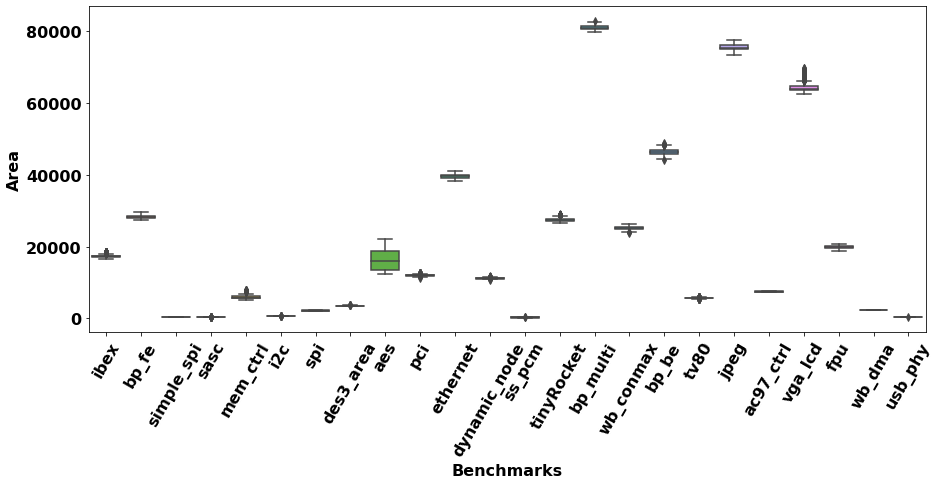

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

ax = sns.boxplot(x="desName", y="area",data=finalDF)
#ax.set_yscale('log')
plt.xticks(rotation=60,weight='bold',fontsize=16)
plt.yticks(weight='bold',fontsize=16)
plt.xlabel('Benchmarks',weight='bold',fontsize=16)
plt.ylabel('Area',weight='bold',fontsize=16)
plt.savefig('area_data.png',fmt = 'png',bbox_inches='tight')
plt.show()

<ipython-input-72-b3710eec1eba>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('nets_data.png',fmt = 'png',bbox_inches='tight')


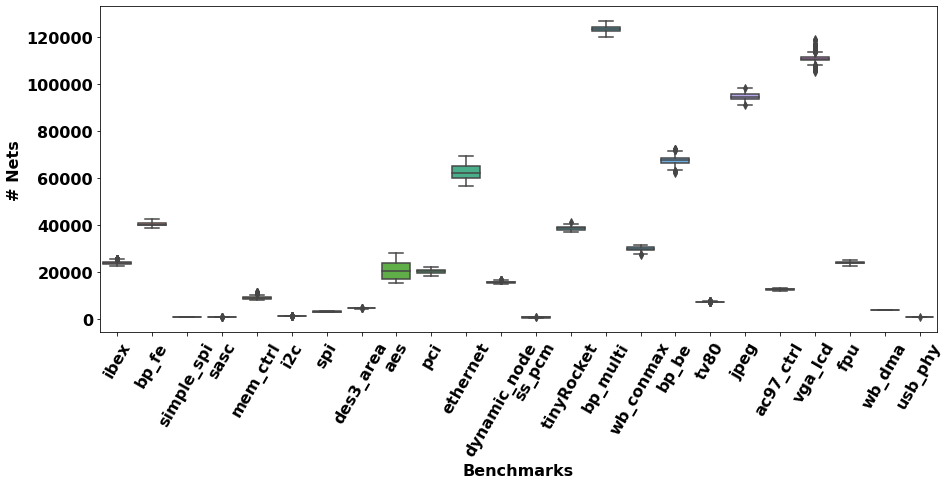

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

ax = sns.boxplot(x="desName", y="wires",data=finalDF)
#ax.set_yscale('log')
plt.xticks(rotation=60,weight='bold',fontsize=16)
plt.yticks(weight='bold',fontsize=16)
plt.xlabel('Benchmarks',weight='bold',fontsize=16)
plt.ylabel('# Nets',weight='bold',fontsize=16)
plt.savefig('nets_data.png',fmt = 'png',bbox_inches='tight')
plt.show()